In [62]:
!conda install -c conda-forge keras --yes


NoSpaceLeftError: No space left on devices.



In [1]:
!conda update -n base -c defaults conda
!conda install -c conda-forge tensorflow --yes


Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.13.0             |   py37hecd8cb5_0         176 KB
    astor-0.8.1                |   py37hecd8cb5_0          47 KB
    backports.functools_lru_cache-1.6.4|     pyhd3eb1b0_0           9 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    c-ares-1.17.1              |       h9ed2024_0          92 KB
    conda-4.10.3               |   py37hecd8cb5_0         2.9 MB
    conda-package-handling-1.7.3|   py37h9ed2024_1         1.5 MB
    gast-0.5.0                 |     pyhd3eb1b0_0          13 KB
    google-pasta-0.2.0         |             py_0          46 KB
    importlib-metadata-3.10.0  |   py37hecd8cb5_0          33 KB
    keras-applications-1.0.8   |             py_1          29 KB
    ke

In [2]:

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [3]:
!pip install pandas

import pandas as pd
df=pd.read_csv("/Users/philipsmith/Documents/training_4.csv",sep=",")
df
#header = next(training_file)
#delimiter = ","
#skip_header = True

,Xt,Psi_i_t,SpMaxA_X,Chi_Dt,VE2_X,VE2sign_L,SpMaxA_AEA(ri),VP
0,0.561,0.054,0.143,0.472,0.370,0.378,0.547,0.931283
1,0.601,0.071,0.167,0.468,0.404,0.408,0.540,0.918234
2,0.693,0.115,0.200,0.548,0.441,0.447,0.636,0.990143
3,0.588,0.050,0.143,0.492,0.366,0.378,0.561,0.859561
4,0.363,0.001,0.077,0.225,0.270,0.277,0.314,0.013144
5,0.849,0.128,0.250,0.658,0.493,0.500,0.781,0.859467
6,0.406,0.008,0.100,0.249,0.310,0.316,0.389,0.121883
7,0.348,0.002,0.071,0.220,0.261,0.267,0.293,0.003374
8,0.675,0.035,0.167,0.599,0.393,0.408,0.698,0.896455
9,0.406,0.007,0.100,0.249,0.310,0.316,0.391,0.021501


In [5]:
x_columns=df.columns
x = df[x_columns].values
y = df['VP'].values

In [8]:
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
oos_yt= []    
oos_y = []
oos_pred = []
fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]  
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(35, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,
              epochs=35)
    
    pred = model.predict(x_test)
    oos_yt.append(y_train)
    oos_y.append(y_test)
    oos_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_absolute_error(pred,y_test))
    print(f"Fold score (MAE): {score}")
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_yt=np.concatenate(oos_yt)

score = np.sqrt(metrics.mean_absolute_error(oos_pred,oos_y))
print(f"Final out of sample (oos) score (RMSE): {score}")    
    


Fold #1
Train on 42 samples, validate on 11 samples
Epoch 1/35
42/42 - 0s - loss: 0.2414 - val_loss: 0.3107
Epoch 2/35
42/42 - 0s - loss: 0.2251 - val_loss: 0.2946
Epoch 3/35
42/42 - 0s - loss: 0.2134 - val_loss: 0.2816
Epoch 4/35
42/42 - 0s - loss: 0.2075 - val_loss: 0.2715
Epoch 5/35
42/42 - 0s - loss: 0.2018 - val_loss: 0.2626
Epoch 6/35
42/42 - 0s - loss: 0.1964 - val_loss: 0.2529
Epoch 7/35
42/42 - 0s - loss: 0.1765 - val_loss: 0.2433
Epoch 8/35
42/42 - 0s - loss: 0.1886 - val_loss: 0.2328
Epoch 9/35
42/42 - 0s - loss: 0.1839 - val_loss: 0.2208
Epoch 10/35
42/42 - 0s - loss: 0.1766 - val_loss: 0.2087
Epoch 11/35
42/42 - 0s - loss: 0.1705 - val_loss: 0.1991
Epoch 12/35
42/42 - 0s - loss: 0.1349 - val_loss: 0.1917
Epoch 13/35
42/42 - 0s - loss: 0.1485 - val_loss: 0.1853
Epoch 14/35
42/42 - 0s - loss: 0.1466 - val_loss: 0.1734
Epoch 15/35
42/42 - 0s - loss: 0.1278 - val_loss: 0.1635
Epoch 16/35
42/42 - 0s - loss: 0.1145 - val_loss: 0.1603
Epoch 17/35
42/42 - 0s - loss: 0.1239 - val_l

In [30]:

!pip install matplotlib
import matplotlib.pyplot as plt
df_1=pd.read_csv("/Users/philipsmith/Documents/validation.csv",sep=",")

df_1_2=df_1['VP'].values

print(df_1_2)
print(oos_pred)
print(oos_y)

[0.859467 0.121883 0.003374 0.781081 0.049411 0.018807 0.006284 0.011044
 0.08039  0.145164 0.015475]
[[ 0.07531247]
 [ 0.6240422 ]
 [ 0.45373878]
 [ 0.6589144 ]
 [ 0.05861497]
 [ 0.09865056]
 [ 0.2869479 ]
 [ 0.16490218]
 [ 0.06701019]
 [ 0.10189034]
 [ 0.043685  ]
 [ 0.03821816]
 [ 0.06938758]
 [ 0.13491735]
 [ 0.07145759]
 [ 0.16163549]
 [ 0.12252794]
 [ 0.23923656]
 [ 0.9135694 ]
 [ 0.8973521 ]
 [ 0.81651866]
 [-0.01333419]
 [ 0.27541718]
 [ 0.03737716]
 [ 0.7657176 ]
 [ 0.00180522]
 [ 0.90138185]
 [ 0.7507064 ]
 [ 0.04380814]
 [ 0.06479006]
 [ 0.05796118]
 [ 0.00508351]
 [ 0.09632078]
 [ 0.00423269]
 [-0.02407946]
 [-0.01845404]
 [ 0.03762025]
 [ 0.6714478 ]
 [-0.01530963]
 [ 0.4217983 ]
 [ 0.00517353]
 [-0.01638996]]
[1.31440e-02 8.96455e-01 7.81081e-01 1.00000e+00 6.28400e-03 3.89900e-02
 4.37870e-01 1.08834e-01 9.71000e-04 1.21883e-01 2.15010e-02 0.00000e+00
 4.94110e-02 1.44573e-01 6.60270e-02 1.88253e-01 1.45164e-01 2.86448e-01
 9.31283e-01 9.18234e-01 8.59467e-01 1.17950e-02

ValueError: x and y must have same first dimension, but have shapes (53, 1) and (212,)

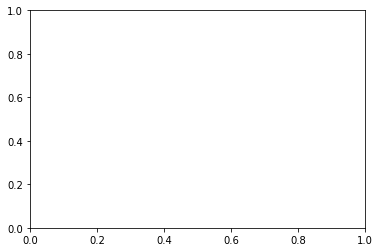

In [9]:
plt.plot(oos_pred, #training Y value
 oos_yt, #predicted Y value
 'ro') #red dots
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
#Compute R-Square value for training set
testR2=r2_score(oos_pred, oos_y)
print("Training Set R-Square=", testR2)

In [46]:
oos_pred_2=y[0:11]
oos_pred_3=np.asarray(oos_pred_2)
print(oos_pred_3)
print(df_1_2)


[0.931283 0.918234 0.990143 0.859561 0.013144 0.859467 0.121883 0.003374
 0.896455 0.021501 0.00864 ]
[0.859467 0.121883 0.003374 0.781081 0.049411 0.018807 0.006284 0.011044
 0.08039  0.145164 0.015475]


Validation Set R-Square= -0.43051958335039475


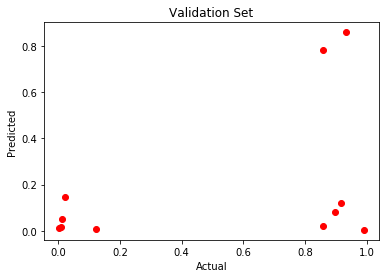

In [52]:
plt.plot(oos_pred_2, #training Y value
 df_1_2, #predicted Y value
 'ro') #red dots
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')
#Compute R-Square value for training set
testR2=r2_score(oos_pred_2,df_1_2)
print("Validation Set R-Square=", testR2)